# ANALYSE DU DATASET

### Notre dataset est composée de 16598 lignes et 10 colonnes.

Il comprend les variables suivantes:

0  Name - object(string)
1 Platform - object(string)
2 Year - float64
3 Genre - object (string)
4 Publisher - object (string)
5 NA_Sales - float64
6 EU_Sales - float64
7 JP_Sales - float64
8 Other_Sales - float64
9 Global_Sales - float64


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

path="https://raw.githubusercontent.com/DeboraMandon/video_game_sales_analysis/main/vgsales.csv"
df=pd.read_csv(path, index_col=0)
df.head()



,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## TYPE DE VARIABLE

In [2]:


print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB
None


In [3]:
var_cat=['Name', 'Platform','Genre', 'Publisher']
var_num=['Year', 'NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']

## TAUX DE NA

In [4]:


print(df.isna().sum())
#pourcentage de valeur nulle pour la variable Year
Year_Na=(df['Year'].isna().sum())/(len(df['Year']))
Year_Na=Year_Na*100
print('Year',round(Year_Na,2),'%')

#pourcentage de valeur nulle pour la variable Publisher
Year_Na=(df['Publisher'].isna().sum())/(len(df['Publisher']))
Year_Na=Year_Na*100
print('Publisher',round(Year_Na,2),'%')

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64
Year 1.63 %
Publisher 0.35 %


## DISTRIBUTION DES VALEURS

In [5]:


print(df.describe())
print(df.describe(include='O'))

               Year      NA_Sales      EU_Sales      JP_Sales   Other_Sales  \
count  16327.000000  16598.000000  16598.000000  16598.000000  16598.000000   
mean    2006.406443      0.264667      0.146652      0.077782      0.048063   
std        5.828981      0.816683      0.505351      0.309291      0.188588   
min     1980.000000      0.000000      0.000000      0.000000      0.000000   
25%     2003.000000      0.000000      0.000000      0.000000      0.000000   
50%     2007.000000      0.080000      0.020000      0.000000      0.010000   
75%     2010.000000      0.240000      0.110000      0.040000      0.040000   
max     2020.000000     41.490000     29.020000     10.220000     10.570000   

       Global_Sales  
count  16598.000000  
mean       0.537441  
std        1.555028  
min        0.010000  
25%        0.060000  
50%        0.170000  
75%        0.470000  
max       82.740000  
                               Name Platform   Genre        Publisher
count               

## ETENDUE DES VALEURS

In [6]:
# ETENDUE DES VALEURS

print(df['Platform'].unique())
print(df['Year'].unique())
print(df['Genre'].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2003. 1986. 2000.   nan 1995. 2016. 1991. 1981. 1987.
 1980. 1983. 2020. 2017.]
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


### La répartition et la distribution des valeurs est très différente selon les variables :

Name - 11493 valeurs uniques, la valeur la plus représentée apparaît 12 fois : Les valeurs en double correspondent à des jeux qui sont sortis sur plusieurs plateformes. 

Publisher - 578 valeurs uniques, on pourra faire des regroupements des best publishers et inversement.
il y a 0.35% de valeurs nulles, cette valeurs nous fait perdre de l’information, nous pouvons supprimer les lignes.


→ La distribution de ces variables ne suit aucune loi.


Platform - 31 valeurs uniques, la répartition suit une droite linéaire avec certaines catégories qui sont plus représentées que les autres.

Year - 39 valeurs uniques, de 1980 à 2020, la moyenne est à 2006, l’étude du boxplot nous permet de démontrer que le maximum des valeurs s’étendent entre 2003 et 2010.
Le maximum de valeurs apparaît en 2009 suivi de très près par 2008.
Il y a 1.63% de valeurs nulles que l’on peut remplacer par le 3ème quantile, 2007 ou les supprimer.

Genre - 12 valeurs uniques, la répartition suit une droite linéaire avec certaines catégories qui sont plus représentées que les autres.

→ La distribution de ces variables est normale.


NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales - (entre 157 et 623 valeurs uniques) pour toutes ces variables qualitatives nous avons une répartition assez similaire avec une concentration des valeurs autour de la moyenne et beaucoup d’outliers en valeurs supérieurs.


### Analyse statistique:

Analyse quantitative des variables NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales:

Après la réalisation du test de Pearsonr entre chacune des variables, nous avons obtenu un résultat de p-value = 0 pour tous les tests.
Nous pouvons donc réfuter l’hypothèse H0 et affirmer que les variables sont corrélées entre elles.

Analyse qualitative:

Test de chi2 réalisée entre les variables Genre et Publisher.
Le résultat de la P-Value qui est égale à 0 nous permet de réfuter H0, on peut donc en déduire qu’il pourrait exister une corrélation entre le Genre et le Publisher.
Le degré de liberté est très élevé car il est à 6347.
Affinons notre analyse par le V de Cramer, son résultat s’élève à 0.32, il est donc <5% et il contredit la P-Value car il nous permet de valider H0.
Il n’existe donc pas de corrélation entre le Genre et le Publisher.

Idem pour l’analyse statistique entre les variables Platform et Publisher.
P-Value=0
degré de liberté= 17310
V de Cramer =0.33
Il n’existe donc pas de corrélation entre la Platform et le Publisher.

Idem pour l’analyse statistique entre les variables Platform et Genre.
P-Value=0
degré de liberté= 330
V de Cramer =0.17
Il n’existe donc pas de corrélation entre la Platform et le Genre.

Analyse entre une variable qualitative et une variable quantitative.
La variable quantitative testée est la variable cible Global_Sales

Existe-t-il une corrélation entre le Genre et Global_Sales?
Test de ANOVA, PR(>F) <5%
On rejette donc l’hypothèse selon laquelle le Genre n’influe pas sur Global_Sales.

Existe-t-il une corrélation entre la Platform et Global_Sales?
Test de ANOVA, PR(>F) <5%
On rejette donc l’hypothèse selon laquelle la Platform n’influe pas sur Global_Sales.
L’analyse statistique a été réalisée avec le jeu de données existant et sans “nettoyage”.
Nous réaliserons à nouveau cette étude une fois le dataset filtré et nettoyé.


## Peformance des ventes moyennes par région


In [7]:
# Calcul de la moyenne des ventes par région
NA_mean=(df['NA_Sales'].mean()*1000000)
EU_mean=(df['EU_Sales'].mean()*1000000)
JP_mean=(df['JP_Sales'].mean()*1000000)
Other_mean=(df['Other_Sales'].mean()*1000000)
Global_mean=(df['Global_Sales'].mean()*1000000)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


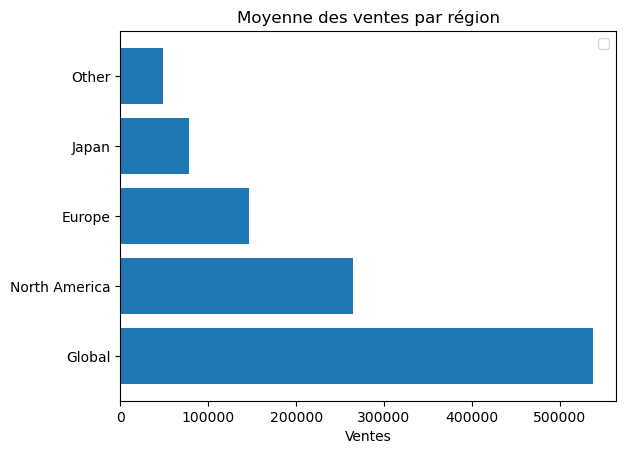

In [8]:
y=['Global','North America', 'Europe', 'Japan','Other']
x=[537440.656,264667.430, 146652.006, 77781.660, 48063.020]

fig, ax = plt.subplots()
ax.barh(y, x, align='center')
ax.set_xlabel('Ventes')
ax.set_title('Moyenne des ventes par région')

plt.legend()
plt.show();


L'Amérique du Nord est la première région avec les ventes moyennes les plus élevées de 264 667 d’unités. Il serait intéressant d’observer quel Genre et quelle Platform sont les plus représentés dans chacune de ces barres.

La répartition des Ventes par région montre que l’Amérique du Nord représente près de la moitié des ventes de jeux vidéo sur le dataset fourni.
Si l’on souhaite affiner notre jeu de données, il sera judicieux de se concentrer sur les données d’Amérique du Nord et d’Europe.


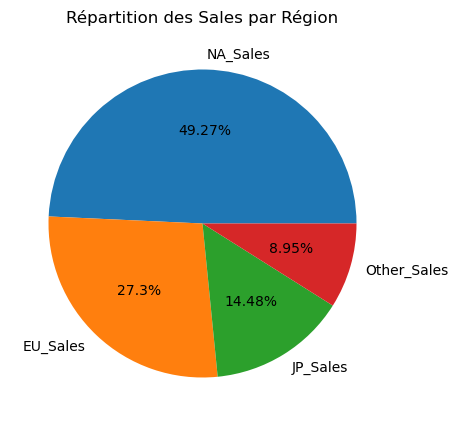

In [9]:
plt.figure(figsize=(15,5))
valeurs=df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
plt.title('Répartition des Sales par Région')
plt.pie(x=valeurs.values,labels=valeurs.index,autopct=lambda x : str(round(x,2))+'%');

La répartition des Ventes par région montre que l’Amérique du Nord représente près de la moitié des ventes de jeux vidéo sur le dataset fourni.
Si l’on souhaite affiner notre jeu de données, il sera judicieux de se concentrer sur les données d’Amérique du Nord et d’Europe.

## Evolution des ventes par région et par an de 1980 à 2018

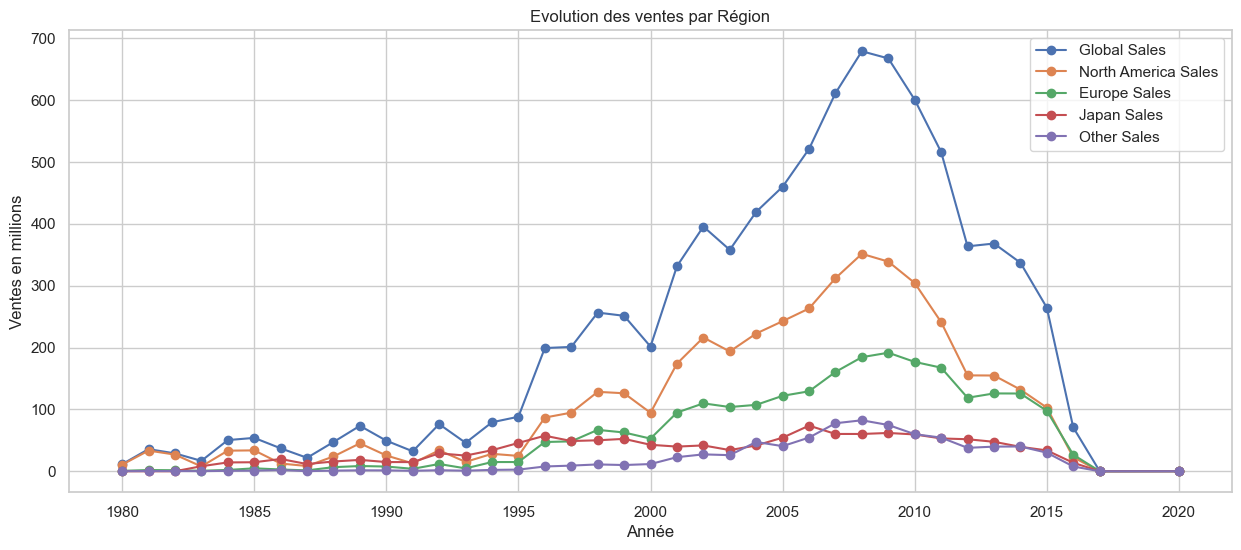

In [10]:
for i in var_num:
    df['cat_'+i]=pd.qcut(df[i], q=[0,.25,.5,.75,1.], duplicates='drop')

df['Year']=pd.to_datetime(df['Year'], format='%Y')

sales_per_year=df.groupby('Year', as_index=False).agg({'NA_Sales':sum, 'EU_Sales':sum, 'JP_Sales':sum, 'Other_Sales':sum,'Global_Sales':sum})

sns.set(style="whitegrid")
plt.figure(figsize=(15,6))
plt.plot_date(x=sales_per_year['Year'].values,
              y=sales_per_year['Global_Sales'].values,
              xdate=True,
              ls='-',
              label='Global Sales')
plt.plot_date(x=sales_per_year['Year'].values,
              y=sales_per_year['NA_Sales'].values,
              xdate=True,
              ls='-',
              label='North America Sales')
plt.plot_date(x=sales_per_year['Year'].values,
              y=sales_per_year['EU_Sales'].values,
              xdate=True,
              ls='-',
              label='Europe Sales')
plt.plot_date(x=sales_per_year['Year'].values,
              y=sales_per_year['JP_Sales'].values,
              xdate=True,
              ls='-',
              label='Japan Sales')
plt.plot_date(x=sales_per_year['Year'].values,
              y=sales_per_year['Other_Sales'].values,
              xdate=True,
              ls='-',
              label='Other Sales')
plt.legend(loc='best')
plt.xlabel('Année')
plt.ylabel('Ventes en millions')
plt.title('Evolution des ventes par Région')
plt.show();

On observe une évolution nette de la vente de jeux vidéo entre 1995 et 2009 puis une chute de la vente de nouveaux jeux vidéo après 2009. On peut noter sur ces graphiques des incohérences en termes de nombre de ventes de jeu par année, on devrait avoir une courbe qui continue à croître.

On remarque également que les courbes sont beaucoup plus écrasées au Japon et dans les autres pays.

Il y a une évolution des courbes à partir des années 2010 qui paraît incohérente avec la réalité, et on peut donc se demander :
 	1/ Dans quelle mesure les données que nous avons dans ce dataset sont fiables ?
 	2/ D'où pourraient provenir ces données ? 
3/ Le dataset concerne-t-il uniquement les ventes physiques ?
4/ Le dataset est-il incomplet ? D’où proviennent les données ?

On peut également se demander si les données entre les années 1980 et 1995 sont vraiment cohérentes avec la réalité.

Afin de pouvoir travailler correctement à partir de ce dataset, il faudra très certainement que nous restreignons notre jeu de données afin d’avoir des données de la meilleure qualité possible, au plus près de la réalité.


## Plateformes préférées selon la Region


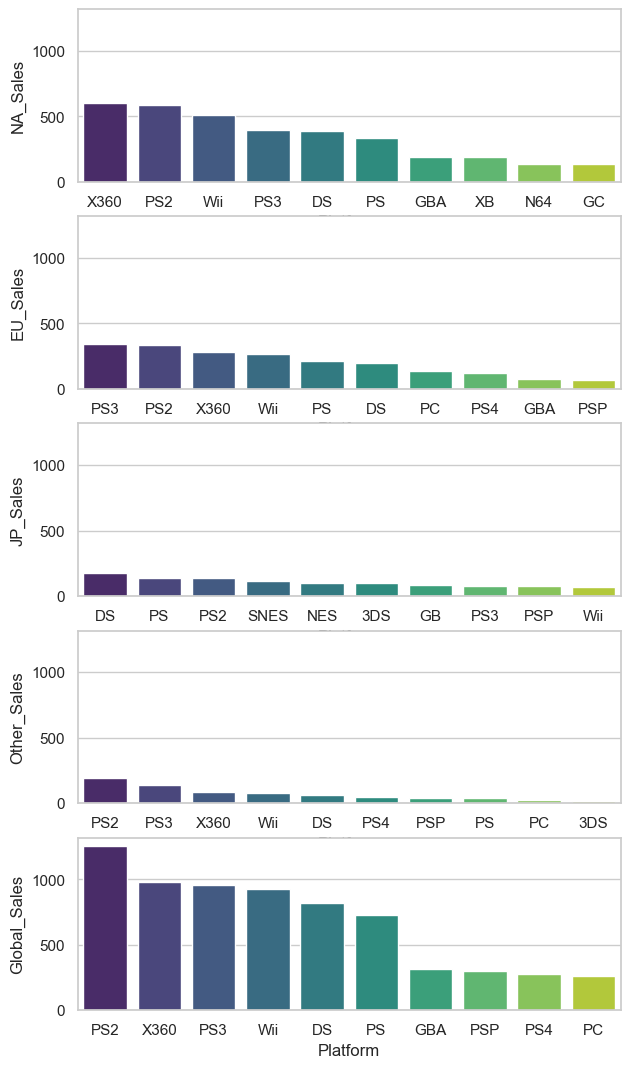

In [11]:
NA_Platform=df.groupby("Platform")[["NA_Sales"]].sum().sort_values(by=['NA_Sales'],ascending=[False]).reset_index().head(10)
EU_Platform=df.groupby("Platform")[["EU_Sales"]].sum().sort_values(by=['EU_Sales'],ascending=[False]).reset_index().head(10)
JP_Platform=df.groupby("Platform")[["JP_Sales"]].sum().sort_values(by=['JP_Sales'],ascending=[False]).reset_index().head(10)
Other_Platform=df.groupby("Platform")[["Other_Sales"]].sum().sort_values(by=['Other_Sales'],ascending=[False]).reset_index().head(10)
Global_Platform=df.groupby("Platform")[["Global_Sales"]].sum().sort_values(by=['Global_Sales'],ascending=[False]).reset_index().head(10)

fig, ax = plt.subplots(5,figsize=(7, 13), sharey=True)

sns.barplot(x='Platform', y='NA_Sales',
            palette="viridis",
            data=NA_Platform,
            ax=ax[0])

sns.barplot(x='Platform', y='EU_Sales',
            palette="viridis",             
            data=EU_Platform,
            ax=ax[1])

sns.barplot(x='Platform', y='JP_Sales',
            palette="viridis", 
            data=JP_Platform,
            ax=ax[2])

sns.barplot(x='Platform', y='Other_Sales',
            palette="viridis",
            data=Other_Platform,
            ax=ax[3])

sns.barplot(x='Platform', y='Global_Sales',
            palette="viridis",
            data=Global_Platform,
            ax=ax[4]);

La console X360 est la console préférée des utilisateurs en Amérique du Nord. Elle totalise un montant total  de 601,05 millions d’unités de vente de jeux.
La PS3 est la console préférée en Europe avec 343,71 millions d’unités  de vente de jeux.
La DS est la console préférée au Japon, avec 175,57 millions d’unités  de vente de jeux.
La PS2 est la console préférée des autres régions, avec 193,44 millions d’unités  de vente de jeux.

## Distribution des ventes en fonction de l’éditeur


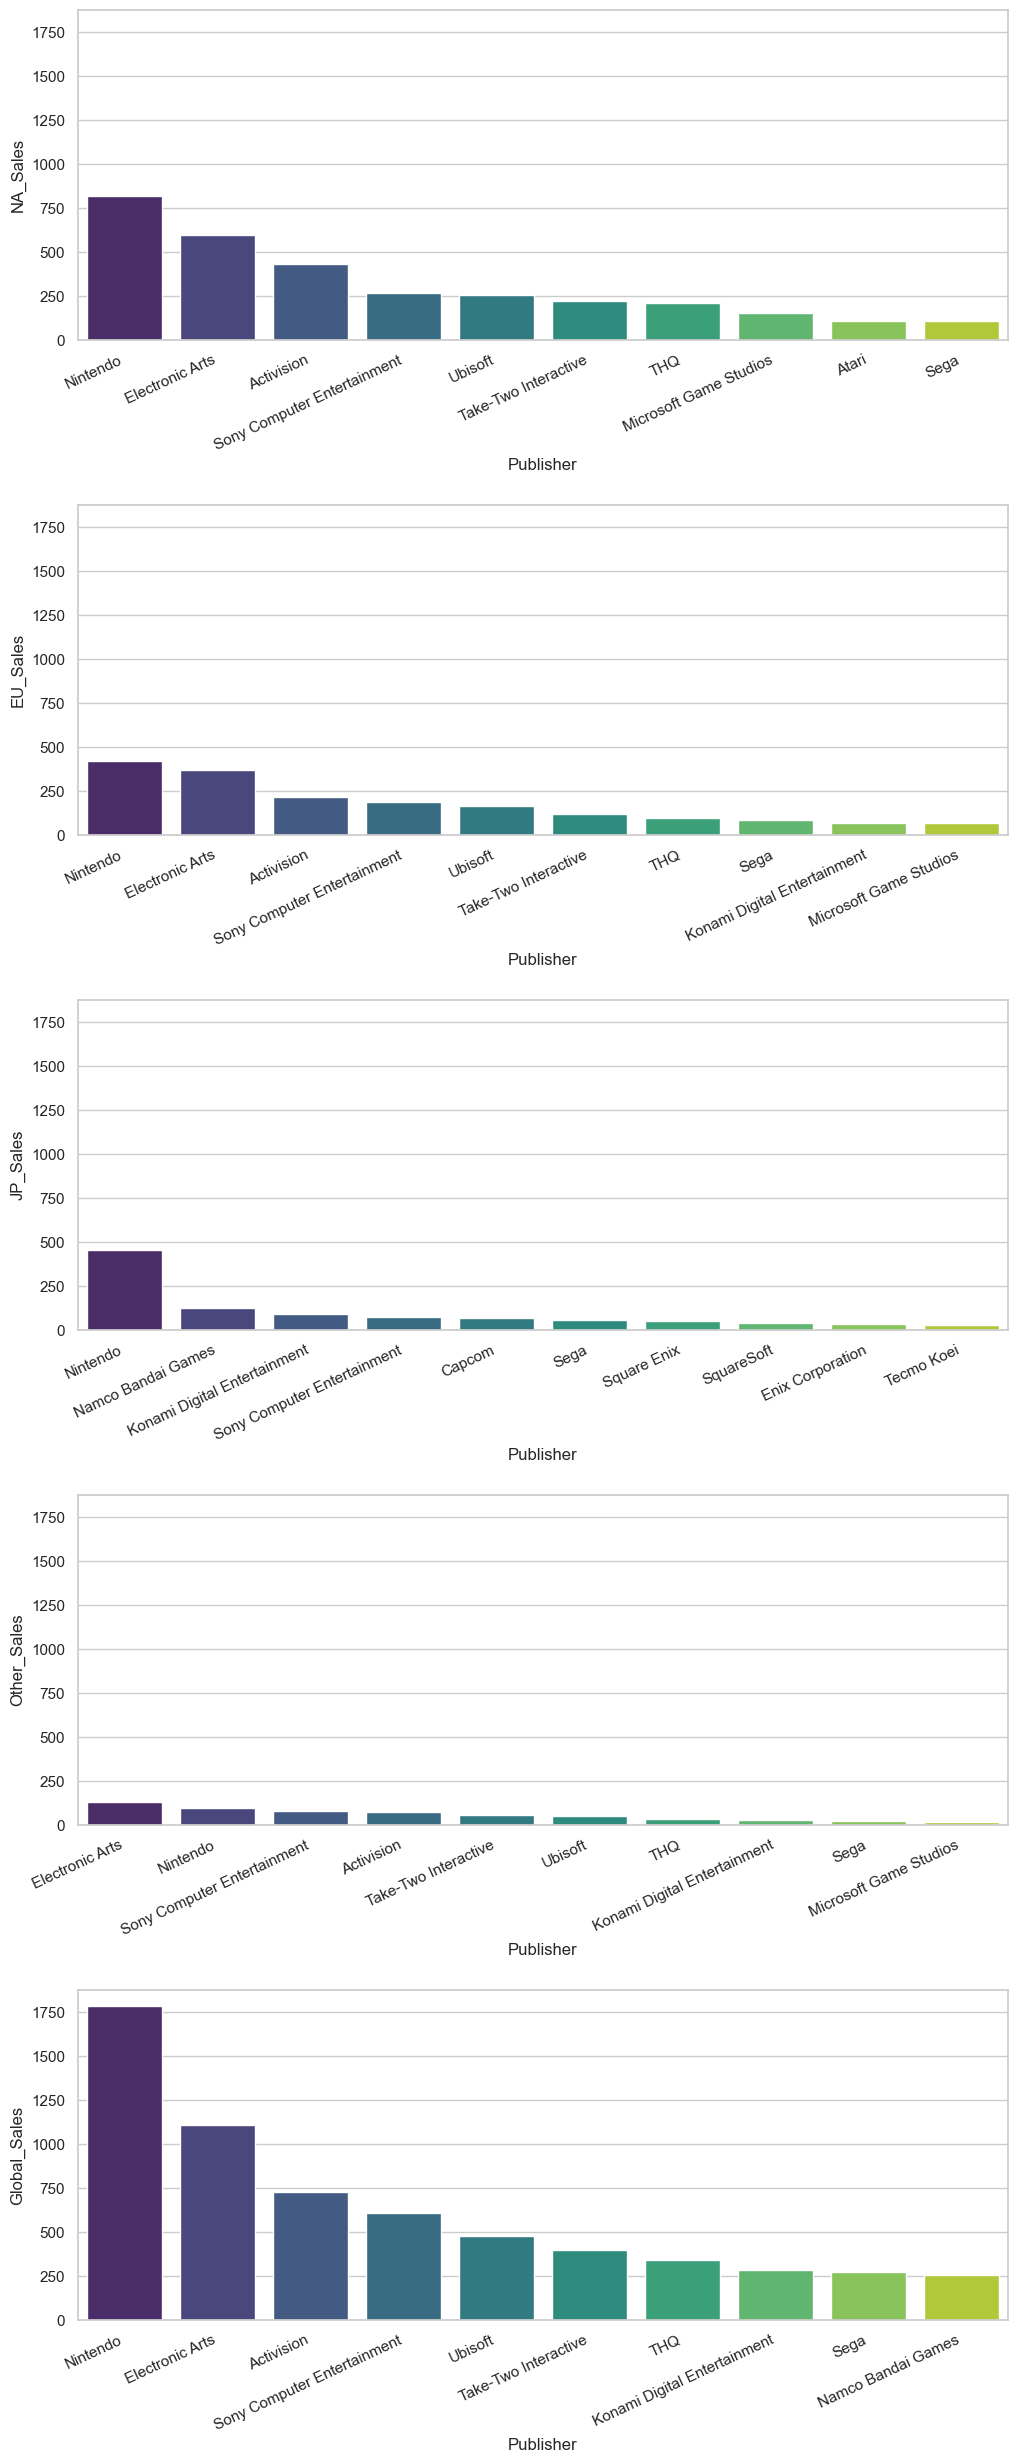

In [12]:
NA_Publisher=df.groupby("Publisher")[["NA_Sales"]].sum().sort_values(by=['NA_Sales'],ascending=[False]).reset_index().head(10)
EU_Publisher=df.groupby("Publisher")[["EU_Sales"]].sum().sort_values(by=['EU_Sales'],ascending=[False]).reset_index().head(10)
JP_Publisher=df.groupby("Publisher")[["JP_Sales"]].sum().sort_values(by=['JP_Sales'],ascending=[False]).reset_index().head(10)
Other_Publisher=df.groupby("Publisher")[["Other_Sales"]].sum().sort_values(by=['Other_Sales'],ascending=[False]).reset_index().head(10)
Global_Publisher=df.groupby("Publisher")[["Global_Sales"]].sum().sort_values(by=['Global_Sales'],ascending=[False]).reset_index().head(10)


fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1, figsize=(12, 30), sharey=True)
fig.subplots_adjust(hspace=0.5)

sns.barplot(x='Publisher', y='NA_Sales',
            palette="viridis",
            data=NA_Publisher,
            ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),
                    rotation=25, ha='right')

sns.barplot(x='Publisher', y='EU_Sales',
            palette="viridis",             
            data=EU_Publisher,
            ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(),
                    rotation=25, ha='right')

sns.barplot(x='Publisher', y='JP_Sales',
            palette="viridis", 
            data=JP_Publisher,
            ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(),
                    rotation=25, ha='right')

sns.barplot(x='Publisher', y='Other_Sales',
            palette="viridis",
            data=Other_Publisher,
            ax=ax4)
ax4.set_xticklabels(ax4.get_xticklabels(),
                    rotation=25, ha='right')

sns.barplot(x='Publisher', y='Global_Sales',
            palette="viridis",
            data=Global_Publisher,
            ax=ax5);
ax5.set_xticklabels(ax5.get_xticklabels(),
                    rotation=25, ha='right');



Nintendo est le premier éditeur en Amérique du Nord, en Europe et au Japon. Il est suivi de Electronic Arts principalement.
Pour l’étude de ces graphiques, un regroupement des 10 premiers Publishers les plus représentés semble correct après lecture de ces histogrammes.


## Genres de jeux vidéos préférés selon la Region


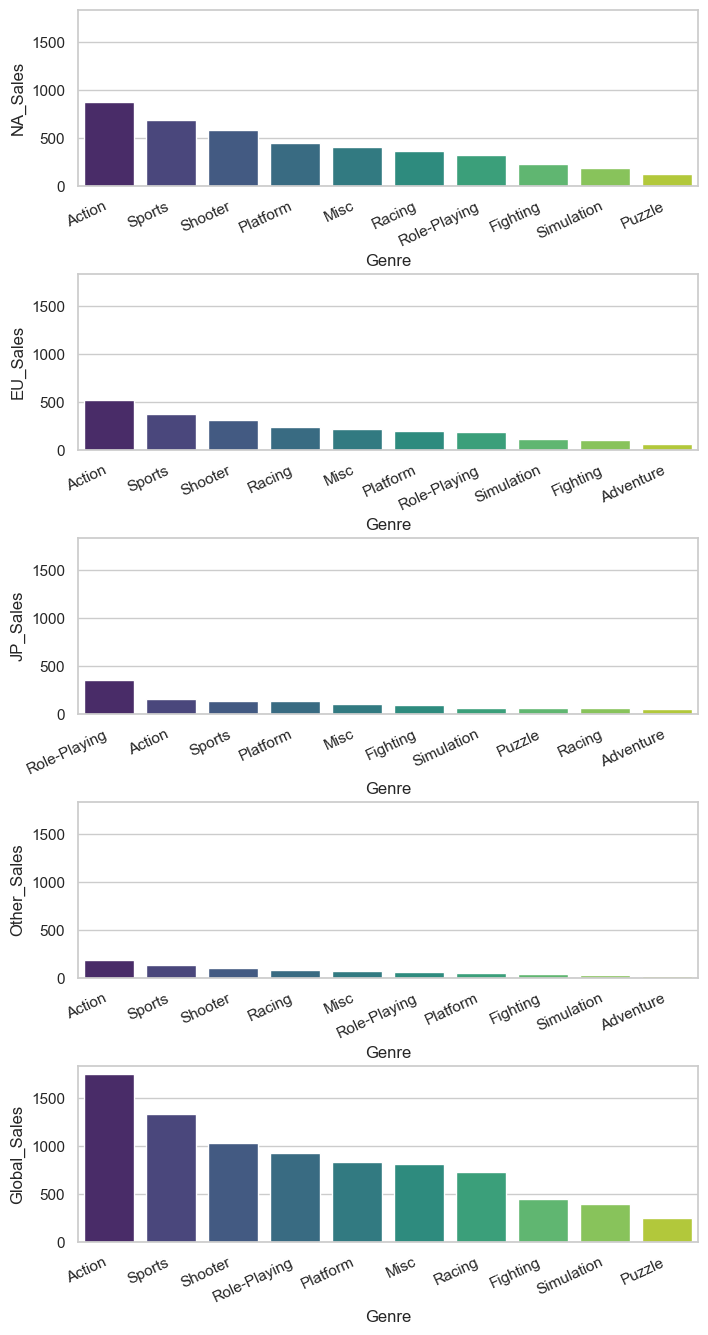

In [13]:
NA_Genre=df.groupby("Genre")[["NA_Sales"]].sum().sort_values(by=['NA_Sales'],ascending=[False]).reset_index().head(10)
EU_Genre=df.groupby("Genre")[["EU_Sales"]].sum().sort_values(by=['EU_Sales'],ascending=[False]).reset_index().head(10)
JP_Genre=df.groupby("Genre")[["JP_Sales"]].sum().sort_values(by=['JP_Sales'],ascending=[False]).reset_index().head(10)
Other_Genre=df.groupby("Genre")[["Other_Sales"]].sum().sort_values(by=['Other_Sales'],ascending=[False]).reset_index().head(10)
Global_Genre=df.groupby("Genre")[["Global_Sales"]].sum().sort_values(by=['Global_Sales'],ascending=[False]).reset_index().head(10)


fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1, figsize=(8, 16), sharey=True)
fig.subplots_adjust(hspace=0.5)

sns.barplot(x='Genre', y='NA_Sales',
            palette="viridis",
            data=NA_Genre,
            ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),
                    rotation=25, ha='right')

sns.barplot(x='Genre', y='EU_Sales',
            palette="viridis",             
            data=EU_Genre,
            ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(),
                    rotation=25, ha='right')

sns.barplot(x='Genre', y='JP_Sales',
            palette="viridis", 
            data=JP_Genre,
            ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(),
                    rotation=25, ha='right')

sns.barplot(x='Genre', y='Other_Sales',
            palette="viridis",
            data=Other_Genre,
            ax=ax4)
ax4.set_xticklabels(ax4.get_xticklabels(),
                    rotation=25, ha='right')

sns.barplot(x='Genre', y='Global_Sales',
            palette="viridis",
            data=Global_Genre,
            ax=ax5);
ax5.set_xticklabels(ax5.get_xticklabels(),
                    rotation=25, ha='right');



Les jeux d’Action sont les plus plébiscités en Amérique du Nord, en Europe et dans les autres régions. Ce sont les jeux de Role-Playing qui sont le plus appréciés au Japon.

Au global ce sont les jeux d’Actions qui ont le plus de ventes suivi des jeux de Sports puis de Shooter, ce qui est cohérent avec la réalité (jeux FIFA pour le sport, Call of Duty et Battlefield pour les Shooters)


## TOP 10 des jeux les plus vendus


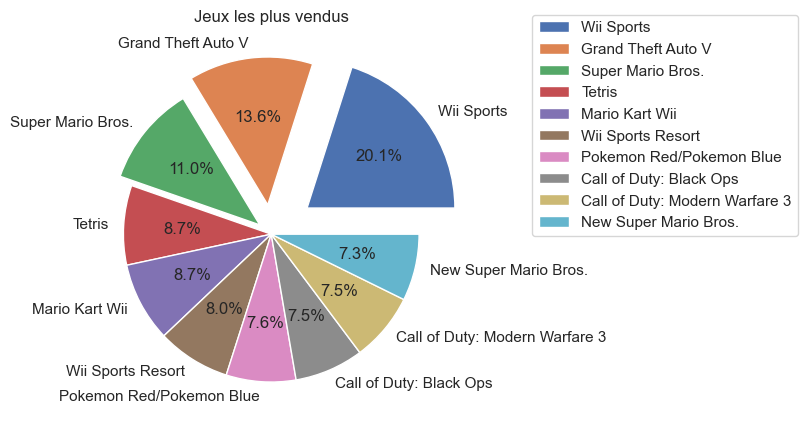

In [14]:

top_games = pd.DataFrame(df.groupby("Name")[["Global_Sales"]].sum().sort_values(by=['Global_Sales'],ascending=[False]).reset_index())
top_games.head(10)

#name_games=top_games['Name'].tolist()
#sales_games=top_games['Global_Sales'].tolist()

ax=top_games.head(10).plot.pie(title='Jeux les plus vendus',
                   y='Global_Sales',
                   labels=top_games['Name'].head(10),
                   explode=(0.3,0.2,0.1,0,0,0,0,0,0,0),
                   autopct='%1.1f%%');
ax.legend(loc='upper left', bbox_to_anchor=(1, 1.3), borderaxespad=5.)
ax.set_ylabel('')
plt.title('Jeux les plus vendus',pad=20)
plt.show();


## Les jeux les plus vendus sont Wii Sports, Grand Theft Auto V puis Super Mario Bros ce qui est cohérent avec la réalité.

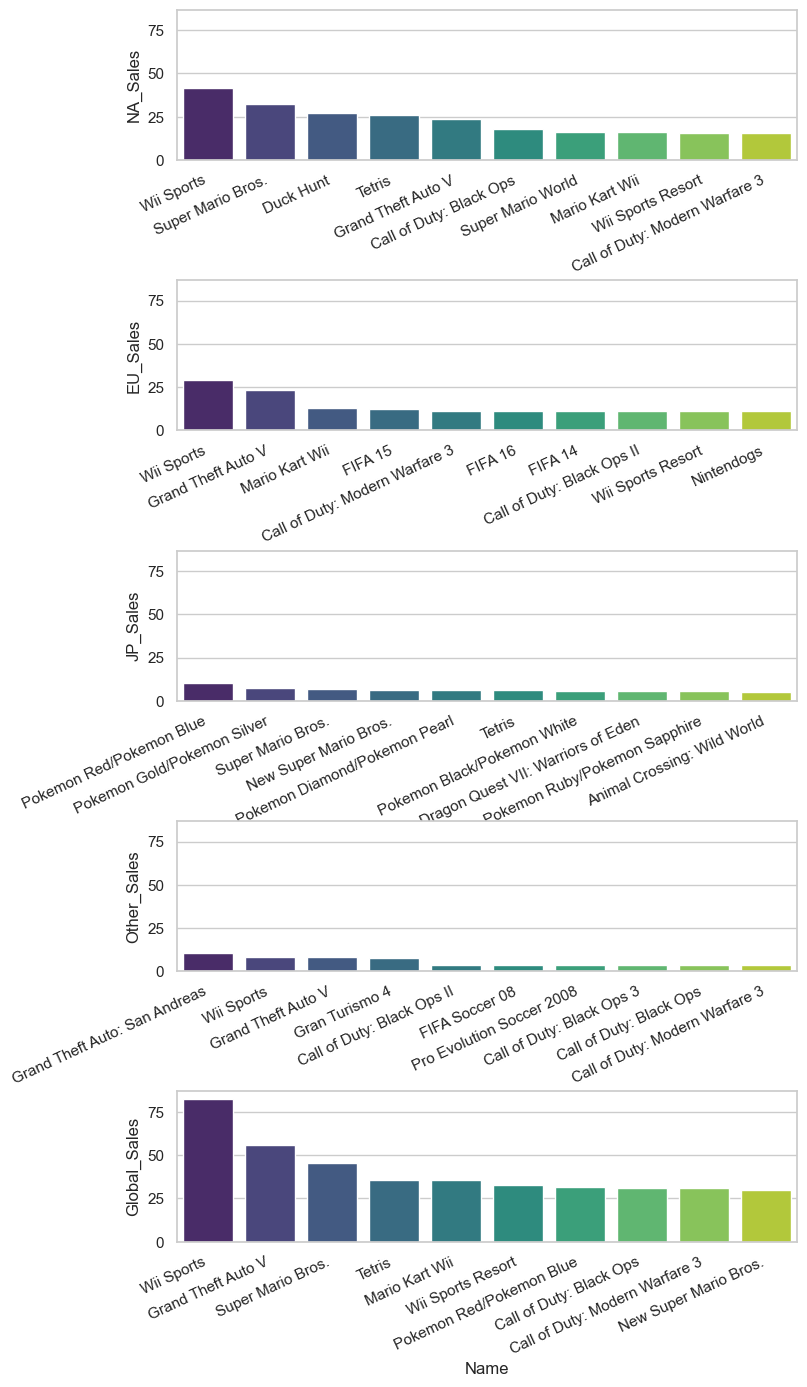

In [15]:
NA_Name=df.groupby("Name")[["NA_Sales"]].sum().sort_values(by=['NA_Sales'],ascending=[False]).reset_index().head(10)
EU_Name=df.groupby("Name")[["EU_Sales"]].sum().sort_values(by=['EU_Sales'],ascending=[False]).reset_index().head(10)
JP_Name=df.groupby("Name")[["JP_Sales"]].sum().sort_values(by=['JP_Sales'],ascending=[False]).reset_index().head(10)
Other_Name=df.groupby("Name")[["Other_Sales"]].sum().sort_values(by=['Other_Sales'],ascending=[False]).reset_index().head(10)
Global_Name=df.groupby("Name")[["Global_Sales"]].sum().sort_values(by=['Global_Sales'],ascending=[False]).reset_index().head(10)


fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1, figsize=(8, 16), sharey=True)
fig.subplots_adjust(hspace=0.8)

sns.barplot(x='Name', y='NA_Sales',
            palette="viridis",
            data=NA_Name,
            ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),
                    rotation=25, ha='right')

sns.barplot(x='Name', y='EU_Sales',
            palette="viridis",             
            data=EU_Name,
            ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(),
                    rotation=25, ha='right')

sns.barplot(x='Name', y='JP_Sales',
            palette="viridis", 
            data=JP_Name,
            ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(),
                    rotation=25, ha='right')

sns.barplot(x='Name', y='Other_Sales',
            palette="viridis",
            data=Other_Name,
            ax=ax4)
ax4.set_xticklabels(ax4.get_xticklabels(),
                    rotation=25, ha='right')

sns.barplot(x='Name', y='Global_Sales',
            palette="viridis",
            data=Global_Name,
            ax=ax5);
ax5.set_xticklabels(ax5.get_xticklabels(),
                    rotation=25, ha='right');

Wii Sports est le jeu le plus vendu en Amérique du nord et en Europe, Pokemon Red/Pokemon Blue est le plus vendu au Japon et Grand Theft Auto: San Andreas est le plus vendu dans les autres pays.

## Répartition des ventes par consoles

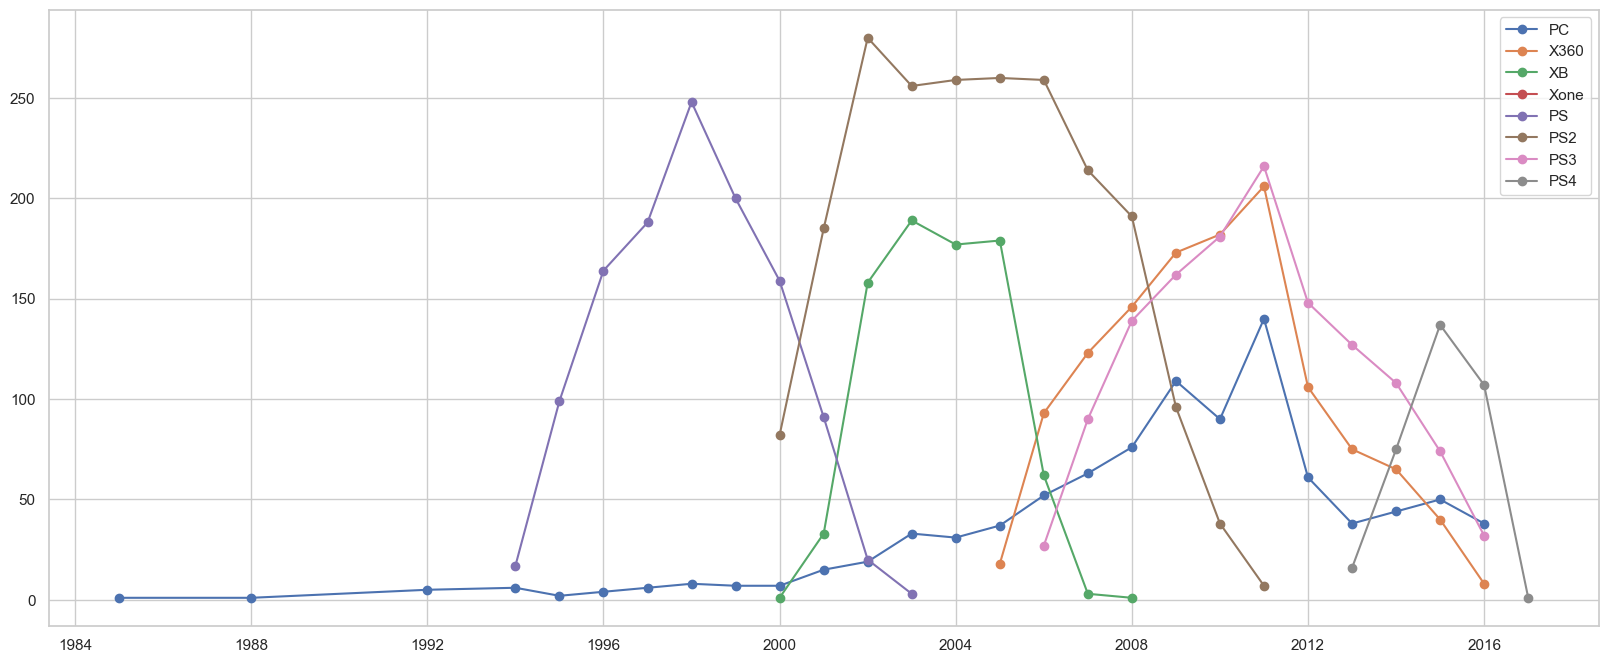

In [16]:
# changement de 'YEAR' au format date
df['Year']=pd.to_datetime(df['Year'], format='%Y')

l_plat=['PC','X360','XB','Xone','PS','PS2','PS3','PS4']
df[df['Platform']=='DS']['Year'].value_counts().sort_index()

plt.figure(figsize=(20,8))
for i in l_plat :
    df_temp=df[df['Platform']==i]['Year'].value_counts().sort_index()
    plt.plot_date(x=df_temp.index,y=df_temp.values,xdate=True,linestyle='-',label=i);
plt.legend();

# date de sortie des consoles:
# PS: 1994/ PS2:2000 / PS3: 2006 / PS4: 2013
# XB: 2001 / X360:2005 / Xone: 2013

date de sortie des consoles:
PS: 1994/ PS2:2000 / PS3: 2006 / PS4: 2013
XB: 2001 / X360:2005 / Xone: 2013

# CONCLUSION

Le dataset est cohérent avec les années de sortie des différentes consoles, mais on retrouve le marché du PC qui semble encore une fois complètement sous-évalué.


En conclusion, les données du dataset ne représentent pas la réalité et ne peuvent pas servir à réaliser des analyses pertinentes.
Nous avons donc besoin de réaliser un affinage des données avant d'entraîner notre modèle de machine learning sur ces dernières. Nous restreindrons notre dataset sur un jeu contenant suffisamment de lignes de données (5000 lignes idéalement) et qui seront de qualité, notamment que le montant des ventes soit cohérent avec la réalité, qui est notre variable cible pour ce projet, afin d’avoir les meilleures prédictions de ventes possible.

Pour la suite de notre projet, notre dataset sera composée des données comprises entre les années 2000 et 2009, et il sera également filtré sur les plateformes suivantes qui sont les plus représentées : les consoles de Sony, Microsoft et Nintendo. 

Nous ajouterons des données grâce à du Web Scraping qui permettront d’obtenir un jeu de données avec des variables les plus pertinentes possibles pour améliorer nos prédictions. Ci-dessous, les variables auxquelles nous avons pensé. Une étude de faisabilité sera faite avant extraction afin d’en retenir quelques-unes.
